In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [1]:
def morsepotential(q,D,a,req):
    """
    Morse potential function U(q)
    D: depth of the potential well
    a: width of the potential well
    req: equilibrium bond length
    """
    morsepotential=D*(1-np.exp(-a*(q-req)))**2 - D
    return morsepotential

In [2]:
def morseforce(q,D,a,req):
    """
    Force function F(q)
    D: depth of the potential well
    a: width of the potential well
    req: equilibrium bond length
    """
    morseforce=2*D*a*np.exp(-a*(q-req))*(np.exp(-a*(q-req))-1)
    return morseforce

In [3]:
def verletstep(q,p,mass,D,a,req,dt):
    """
    Verlet integration step
    q: current position
    p: current momentum
    mass: mass
    D: depth of the potential well
    a: width of the potential well
    req: equilibrium bond length
    dt: time step
    """
    phalf=p+0.5*dt*morseforce(q,D,a,req)
    qnext=q+dt*phalf/mass
    pnext=phalf+0.5*dt*morseforce(qnext,D,a,req)
    return qnext,pnext

In [4]:
def morsemd(q0, p0, m, D, a, req, dt, nstep):
    """
    q0: initial position
    p0: initial momentum
    m: mass
    D: depth of the potential well
    a: width of the potential well
    req: equilibrium bond length
    dt: time step
    nstep: number of steps
    """
    X=[]
    P=[]
    T=[]
    Epot=[]
    Ekin=[]
    Etot=[]
    q=q0
    p=p0
    for i in range(nstep):
        X.append(q)
        P.append(p)
        T.append(i*dt)
        Epot.append(morsepotential(q, D, a, req))
        Ekin.append(0.5*m*(p**2))
        Etot.append(Epot[-1]+Ekin[-1])
        q,p=verletstep(q,p,m,D,a,req,dt)
    X=np.array(X)
    P=np.array(P)
    return X, P, T, Epot, Ekin, Etot

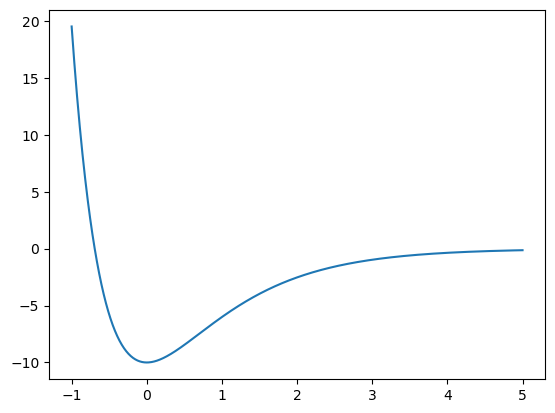

In [41]:
#plot for potential
D=10.0
a=1.0
req=0.0
qrange=np.linspace(-1.0,5.0,1000)
U=morsepotential(qrange,D,a,req)
plt.plot(qrange,U)

In [80]:
def enerforc(q,k):
    """
    Calculate potential energy and force for Morse potential
    U(q) =De*[1-exp(-a*(q-qe))]^2
    F(q) =-dU(q)/dq=2*a*De*[1-exp(-a*(q-qe))]*exp(-a*(q-qe))
    where q is the coordinate, k is the force constant, and qe, De, and a are parameters that define the potential.
    """
    qe=1.0
    De=1.0
    a=1.0
    
    u=De*(1.0-np.exp(-a*(q-qe)))**2
    f=-2.0* a*De*(1.0-np.exp(-a*(q-qe)))*np.exp(-a*(q-qe))
    
    return u, f

In [81]:
def enerverlet(q,p,f,mass,dt):
    a=f/mass
    qnew=q+p*dt+0.5*a*dt**2
    epot,f=enerforc(qnew,p)
    anew=fnew/mass
    pnew=p+ 0.5*(a+anew)*dt
    return qnew,pnew,fnew

In [82]:
def morsemd2(q0,p0,mass,k,dt,nstep):
    X=[]
    P=[]
    T=[]
    Epot=[]
    Ekin=[]
    Etot=[]
    q=q0
    p=p0
    for i in range(nstep):
        X.append(q)
        P.append(p)
        T.append(i*dt)
        epot,f=enerforc(q,p)
        q,p,f=enerverlet(q,p,f,mass,dt)
        Epot.append(epot)
        ekin=0.5*p**2/mass
        Ekin.append(ekin)
        Etot.append(epot+ekin)
    X = np.array(X)
    P = np.array(P)
    return T,Ekin,Etot,Epot,X,P

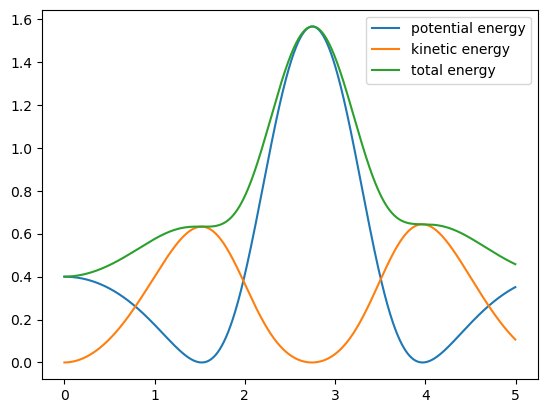

In [83]:
#total energy plot dt=0.005 nstep=2000
q0=2.0
p0=0.0
mass=1.0
k=1.0
dt=0.005
nstep=1000
T,Ekin,Etot,Epot,X,P=morsemd2(q0,p0,mass,k,dt,nstep)
plt.plot(T,Epot,label='potential energy')
plt.plot(T,Ekin,label='kinetic energy')
plt.plot(T,Etot,label='total energy')
plt.legend()

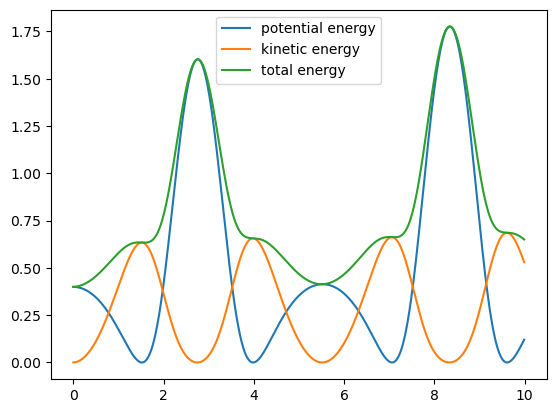

In [84]:
#total energy plot dt=0.01 nstep=1000
q0=2.0
p0=0.0
mass=1.0
k=1.0
dt=0.01
D=10.0
a=1.0
nstep=1000
T,Ekin,Etot,Epot,X,P=morsemd2(q0,p0,mass,k,dt,nstep)
plt.plot(T,Epot,label='potential energy')
plt.plot(T,Ekin,label='kinetic energy')
plt.plot(T,Etot,label='total energy')
plt.legend()

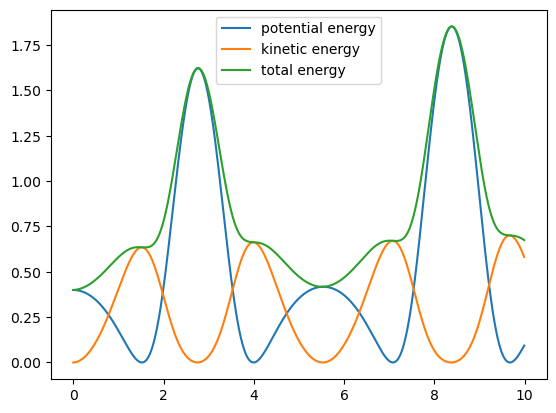

In [85]:
#total energy plot dt=0.0125 nstep=800
q0=2.0
p0=0.0
mass=1.0
k=1.0
dt=0.0125
nstep=800
T,Ekin,Etot,Epot,X,P=morsemd2(q0,p0,mass,k,dt,nstep)
plt.plot(T,Epot,label='potential energy')
plt.plot(T,Ekin,label='kinetic energy')
plt.plot(T,Etot,label='total energy')
plt.legend()

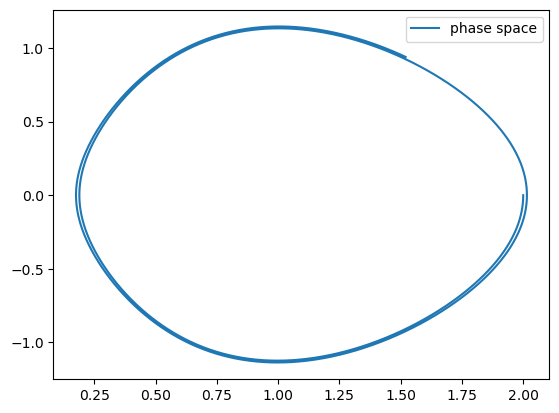

In [70]:
#phase space dt=0.005, nstep=2000
q0=2.0
p0=0.0
mass=1.0
k=1.0
dt=0.005
D=10.0
a=1.0
nstep=2000
T,Ekin,Etot,Epot,X,P=morsemd2(q0,p0,mass,k,dt,nstep)
plt.plot(X,P,label='phase space')
plt.legend()

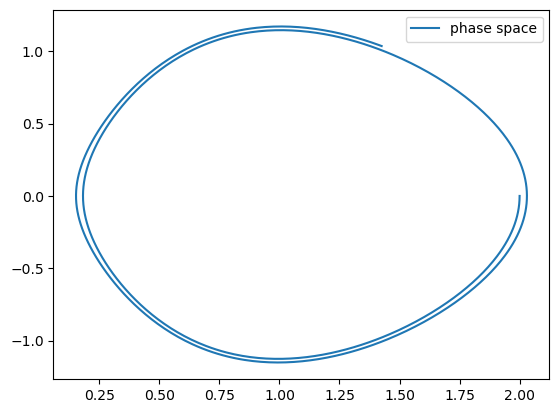

In [71]:
#phase space dt=0.01, nstep=1000
q0=2.0
p0=0.0
mass=1.0
k=1.0
dt=0.01
D=10.0
a=1.0
nstep=1000
T,Ekin,Etot,Epot,X,P=morsemd2(q0,p0,mass,k,dt,nstep)
plt.plot(X,P,label='phase space')
plt.legend()

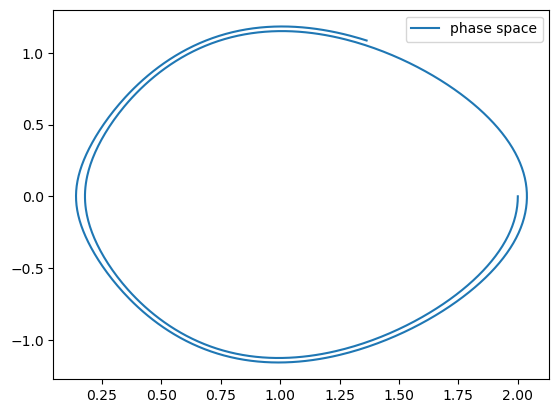

In [63]:
#phase space dt=0.0125, nstep=800
#total energy plot dt=0.0125 nstep=800
q0=2.0
p0=0.0
mass=1.0
k=1.0
dt=0.0125
nstep=800
T,Ekin,Etot,Epot,X,P=morsemd2(q0,p0,mass,k,dt,nstep)
plt.plot(X,P,label='phase space')
plt.legend()

In [27]:
def eulerstep(q,p,mass,f,dt):
    qnew=q+dt*(p/mass)
    pnew=p+dt*f(q) 
    return qnew,pnew

In [28]:
def midpointeulerstep(q,p,mass,f,dt):
    pmid = p+0.5*dt*f(q)
    qnew = q+dt*(pmid/mass)
    pnew = p+dt*f(qnew) 
    return qnew,pnew

In [29]:
def eulermd(q0,p0,mass,k,dt,nstep):
    """
    q0: initial position
    p0: initial momentum
    k: force constant
    dt: time step
    nstep: number of steps
    """
    Xeuler=[]
    Peuler=[]
    Xmeuler=[]
    Pmeuler=[]
    xeuler=q0
    peuler=p0
    xmeuler=q0
    pmeuler=p0
    for i in range(nstep):
        Xeuler.append(xeuler)
        Peuler.append(peuler)
        xeuler,peuler=eulerstep(xeuler,peuler,mass, lambda q:-k*(q-req)*np.exp(-a*(q-req)),dt)
        Xmeuler.append(xmeuler)
        Pmeuler.append(pmeuler)
        xmeuler,pmeuler=midpointeulerstep(xmeuler,pmeuler,mass,lambda q:-k*(q-req)*np.exp(-a*(q-req)),dt)
        T.append(i*dt)
    Xeuler=np.array(Xeuler)
    Peuler=np.array(Peuler)
    Xmeuler=np.array(Xmeuler)
    Pmeuler=np.array(Pmeuler)
    return Xeuler,Peuler,Xmeuler,Pmeuler

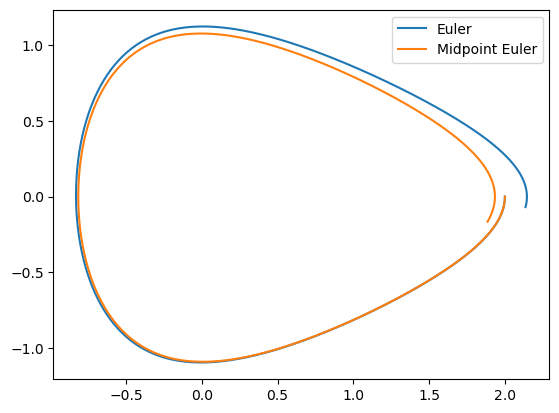

In [72]:
q0 = 2.0
p0 = 0
mass=1.0
k=1.0
dt=0.01
nstep=1000
Xeuler,Peuler,Xmeuler,Pmeuler=eulermd(q0,p0,mass,k,dt,nstep)
plt.plot(Xeuler,Peuler,label='Euler')
plt.plot(Xmeuler,Pmeuler,label='Midpoint Euler')
plt.legend()

In [73]:
def boundandunbound(q0,p0,mass,k,dt,nstep,threshold):
    """
    q0 start coord
    p0 start moment
    mass
    k force constant potential
    delta_t integration timestep
    nstep number steps
    threshold energy threshold for determining bound vs unbound dynamics
    """
    x=q0
    p=p0
    X=[]
    P=[]
    T=[]
    Epot=[]
    Ekin=[]
    Etot=[]
    bound=True
    for i in range(nstep):
        X.append(x)
        P.append(p)
        T.append(i*dt)
        xhalf=x+0.5*dt*p/mass
        fhalf=-5*(xhalf-1)*np.exp(-(xhalf-1))
        p=p+dt+fhalf
        x=x+dt*p/mass
        epot,f=enerforc(x,k)
        etot=0.5*p**2/mass+epot
        if etot>threshold:
            bound=False
        if bound==False:
            break
        ekin=0.5*p**2/mass
        Etot.append(etot)
        Epot.append(epot)
        Ekin.append(ekin)
        
    return X,P,T,Ekin,Epot,Etot

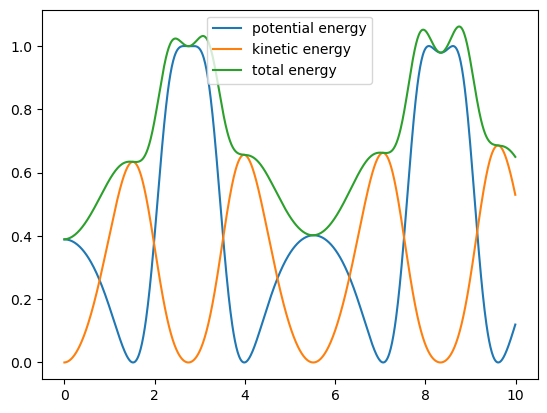

In [74]:
#bound
X,P,T,Epot,Ekin,Etot = boundandunbound(0.1,0,1,1,0.001,10000,-0.1)
T,Ekin,Etot,Epot,X,P=morsemd2(q0,p0,mass,k,dt,nstep)
plt.plot(T,Epot,label='potential energy')
plt.plot(T,Ekin,label='kinetic energy')
plt.plot(T,Etot,label='total energy')
plt.legend()

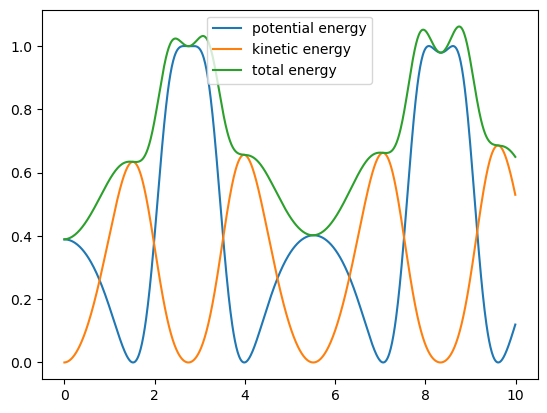

In [75]:
#unbound
X,P,T,Epot,Ekin,Etot = boundandunbound(0.1,0,1,1,0.001,10000,-0.1)
T,Ekin,Etot,Epot,X,P=morsemd2(q0,p0,mass,k,dt,nstep)
plt.plot(T,Epot,label='potential energy')
plt.plot(T,Ekin,label='kinetic energy')
plt.plot(T,Etot,label='total energy')
plt.legend()